## Data Importing from Kaggle

In [1]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 25.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
! pip install -q kaggle

In [2]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esraaabdallah","key":"6a60af1197ede58f27bd899dbfdd94ae"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone 

100% 1.52G/1.52G [01:43<00:00, 17.4MB/s]
100% 1.52G/1.52G [01:43<00:00, 15.8MB/s]


In [5]:
!unzip /content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip 

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

## Libraries

In [6]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from keras_preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt
from keras.regularizers import l2
import numpy as np
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 

In [8]:
import pandas as pd
data = pd.read_csv('/content/kidneyData.csv')

In [9]:
data

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [11]:
data['Class'].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [12]:
kidney_classes = data['Class'].value_counts()
kidney_classes

Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: Class, dtype: int64

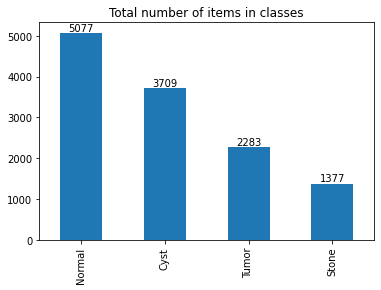

In [13]:
plot_bar = kidney_classes.plot.bar(title='Total number of items in classes')
plot_bar.bar_label(plot_bar.containers[0]);

## Data spiliting 

In [14]:
splitfolders.ratio(
    "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.80,0.10, 0.10)
)

Copying files: 12446 files [00:06, 1953.37 files/s]


In [15]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


##Preprocessing for testing data for predictions

In [16]:
import cv2
data_dir = (r'./dataset/test/')
categories = ['Cyst', 'Normal' ,'Stone', 'Tumor'] 

In [17]:
img_size = 200

In [18]:
test_data = []

for i in categories:
    test_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(test_path):
        try:
            image_arr = cv2.imread(os.path.join(test_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            test_data.append([new_image_array , tag])
        except Exception as e:
            pass

In [19]:
xtest = []
ytest = []
for i,j in test_data:
    xtest.append(i)
    ytest.append(j)
xtest = np.array(xtest).reshape(-1,img_size,img_size)
print(xtest.shape)
xtest = xtest/255.0  
xtest = xtest.reshape(-1,200,200,1)

(1249, 200, 200)


## CNN Model

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [21]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [22]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=2,)

Epoch 1/2
100/100 [==============================] - 93s 789ms/step - loss: 1.0967 - accuracy: 0.5668 - precision: 0.6739 - recall: 0.3842 - val_loss: 0.8340 - val_accuracy: 0.6594 - val_precision: 0.7468 - val_recall: 0.5604
Epoch 2/2
100/100 [==============================] - 79s 785ms/step - loss: 0.6553 - accuracy: 0.7419 - precision: 0.7943 - recall: 0.6740 - val_loss: 0.2998 - val_accuracy: 0.9034 - val_precision: 0.9192 - val_recall: 0.8792


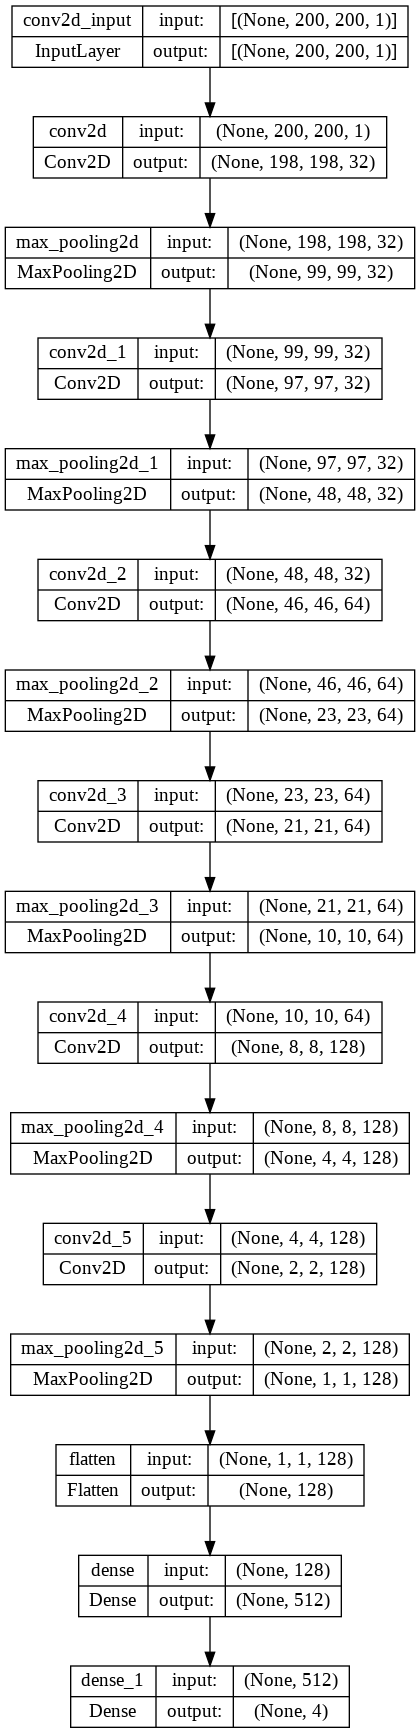

In [23]:
#model archit
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [24]:
model.save('/content/drive/MyDrive/model.hdf5')

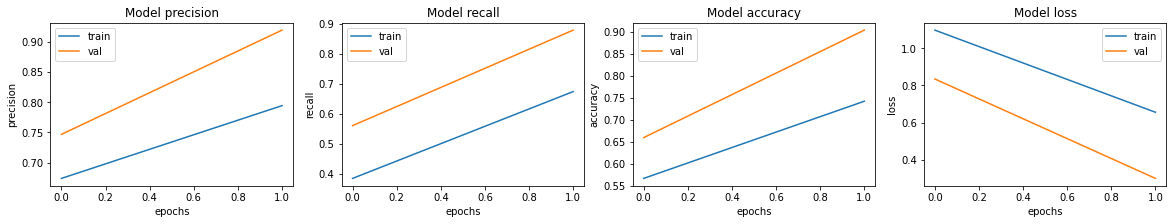

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [26]:
predictions = model.predict(xtest)

40/40 [==============================] - 1s 14ms/step


In [27]:
ypred = [np.argmax(element) for element in predictions]

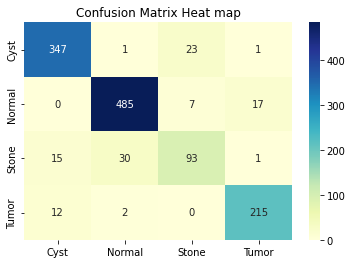

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=['Cyst', 'Normal' ,'Stone', 'Tumor'], yticklabels=['Cyst', 'Normal' ,'Stone', 'Tumor']).set_title('Confusion Matrix Heat map')
plt.show()

In [29]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [30]:
diseases_labels

['Cyst', 'Normal', 'Stone', 'Tumor']

In [31]:
ytest = np.array(ytest)

In [32]:
ypred = np.array(ypred)

In [33]:
def evaluate(actual, pre):
  accuracy = ((pre == actual).sum()) / actual.shape[0]
  print(f'Accuracy: {accuracy}')
  

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9127301841473179
Precision: 0.8847504756758703
Recall: 0.8733934497333445
F1_score: 0.8783607029168625


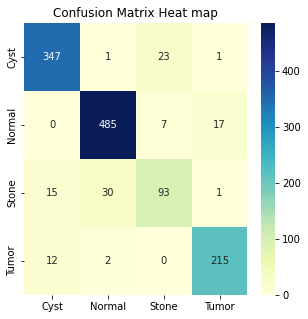

In [34]:
evaluate(ytest,ypred)

## CNN MODEL TO SVM Model

In [35]:
model_svm = Sequential()

model_svm.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=train_dataset.image_shape))
model_svm.add(MaxPool2D(pool_size=(2,2),strides = 2))

model_svm.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model_svm.add(MaxPool2D(pool_size=(2,2),strides = 2))

model_svm.add(Flatten())
model_svm.add(Dense(128,activation="relu"))

#Output layer
model_svm.add(Dense(4,kernel_regularizer = l2(0.01),activation= 'softmax')) 

In [36]:
model_svm.compile(optimizer='adam',loss='squared_hinge', metrics = ['accuracy'])

In [37]:
model_svm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [38]:
history_svm = model_svm.fit(train_dataset, validation_data = valid_dataset, epochs=3)

Epoch 1/3
100/100 [==============================] - 77s 758ms/step - loss: 1.0111 - accuracy: 0.7873 - val_loss: 0.9207 - val_accuracy: 0.8583
Epoch 2/3
100/100 [==============================] - 77s 766ms/step - loss: 0.8582 - accuracy: 0.9250 - val_loss: 0.7972 - val_accuracy: 0.9855
Epoch 3/3
100/100 [==============================] - 75s 746ms/step - loss: 0.7865 - accuracy: 0.9880 - val_loss: 0.7792 - val_accuracy: 0.9903


In [39]:
model_svm.save('/content/drive/MyDrive/model_svm.hdf5')

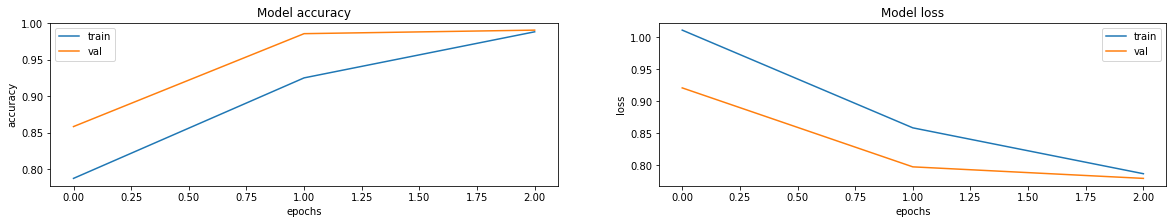

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))

ax = ax.ravel()



for i, met in enumerate([ 'accuracy', 'loss']):

    ax[i].plot(history_svm.history[met])

    ax[i].plot(history_svm.history['val_' + met])

    ax[i].set_title('Model {}'.format(met))

    ax[i].set_xlabel('epochs')

    ax[i].set_ylabel(met)

    ax[i].legend(['train', 'val'])

In [41]:
preddsvm = model_svm.predict(xtest)

40/40 [==============================] - 0s 6ms/step


In [42]:
predsvm = [np.argmax(element) for element in preddsvm]

In [43]:
predsvm = np.array(predsvm)

Accuracy: 0.9935948759007206
Precision: 0.9919500506157177
Recall: 0.9891458012629198
F1_score: 0.9905145080074217


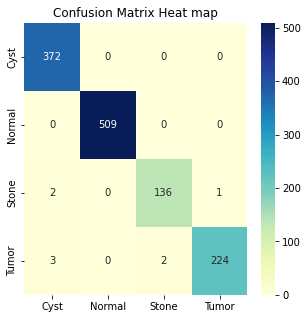

In [44]:
evaluate(ytest,predsvm)

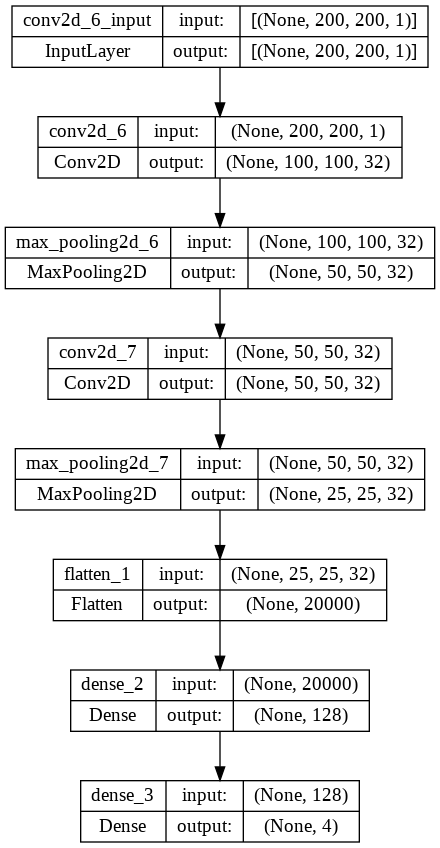

In [45]:
#model archit
import tensorflow as tf
tf.keras.utils.plot_model(
    model_svm, to_file='model2.png', show_shapes=True,
    show_layer_names=True,
)

## Ensemble

In [46]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [47]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model = load_model('/content/drive/MyDrive/model.hdf5')
model_svm = load_model('/content/drive/MyDrive/model_svm.hdf5')

models = [model ,model_svm]


In [48]:
preds = [model.predict(xtest) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

40/40 [==============================] - 0s 5ms/step


In [49]:
preds

array([[[6.98263943e-01, 2.95615979e-02, 1.36301979e-01, 1.35872424e-01],
        [8.86996806e-01, 5.82261663e-03, 7.96317905e-02, 2.75488496e-02],
        [9.13798392e-01, 1.10782764e-03, 7.93921724e-02, 5.70159964e-03],
        ...,
        [3.78038385e-04, 2.82762069e-02, 9.39968857e-04, 9.70405817e-01],
        [2.09625617e-01, 5.08913845e-02, 1.08254813e-01, 6.31228268e-01],
        [2.45870978e-01, 2.34180950e-02, 4.96930033e-02, 6.81017876e-01]],

       [[9.99296904e-01, 9.86295845e-08, 7.02495687e-04, 4.29799115e-07],
        [9.66206431e-01, 2.02451646e-02, 1.29959397e-02, 5.52450307e-04],
        [9.99988914e-01, 7.07246900e-11, 1.11110185e-05, 1.46409118e-09],
        ...,
        [7.78301765e-05, 4.46810664e-05, 1.48796279e-03, 9.98389602e-01],
        [5.22470772e-01, 1.19514634e-05, 4.77516592e-01, 6.31279192e-07],
        [5.50733745e-01, 5.52455640e-06, 4.49258983e-01, 1.78012795e-06]]],
      dtype=float32)

In [50]:
summed

array([[1.6975608e+00, 2.9561697e-02, 1.3700448e-01, 1.3587286e-01],
       [1.8532033e+00, 2.6067782e-02, 9.2627734e-02, 2.8101299e-02],
       [1.9137874e+00, 1.1078278e-03, 7.9403281e-02, 5.7016010e-03],
       ...,
       [4.5586855e-04, 2.8320888e-02, 2.4279316e-03, 1.9687954e+00],
       [7.3209637e-01, 5.0903335e-02, 5.8577138e-01, 6.3122892e-01],
       [7.9660475e-01, 2.3423620e-02, 4.9895197e-01, 6.8101966e-01]],
      dtype=float32)

In [51]:
ensemble_prediction = np.argmax(summed, axis=1)
ensemble_prediction

array([0, 0, 0, ..., 3, 0, 0])

In [52]:
accuracy1 = accuracy_score(ytest, ypred)
accuracy2 = accuracy_score(ytest, predsvm)

In [53]:
ensemble_accuracy = accuracy_score(ytest, ensemble_prediction)
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)


Accuracy Score for model1 =  0.9127301841473179
Accuracy Score for model2 =  0.9935948759007206
Accuracy Score for average ensemble =  0.9919935948759008
